In [1]:
import pandas as pd

# Load the dataset
file_path = 'study2_associative_session_2_data_transformed.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


Experiment   v1_mean   v2_mean   v3_mean  \
0  1000_associative_priming_part_2.dat  1.732217  1.725690 -2.213851   
1  1001_associative_priming_part_2.dat  3.666691  3.063541 -2.811543   
2  1002_associative_priming_part_2.dat  2.293933  1.964832 -2.084187   
3  1003_associative_priming_part_2.dat  3.030738  3.095060 -2.812462   
4  1004_associative_priming_part_2.dat  1.587394  1.561871 -1.265579   

    v4_mean   zr_mean    a_mean  ndt1_mean  ndt2_mean  ndt3_mean  ...  \
0 -2.382699  0.563381  1.127208   0.514069   0.547915   0.527823  ...   
1 -2.677491  0.412589  1.223860   0.495184   0.482430   0.537666  ...   
2 -2.441773  0.490410  1.370054   0.431362   0.454298   0.499440  ...   
3 -2.745980  0.441987  1.501349   0.441862   0.467255   0.503387  ...   
4 -1.815228  0.395819  0.800762   0.436232   0.453369   0.484397  ...   

                                                q4_E    ID  Task    Session  \
0        [0.991 1.119 1.093 2.199 0.958 0.934 1.135]  1000   APT  Session 2   
1                                [0.688 2.128 1.472]  1001   APT  Session 2   
2                          [0.967 0.967 0.911 0.943]  1002   APT  Session 2   
3                                             [1.04]  1003   APT  Session 2   
4  [0.867 0.69  0.833 0.794 0.73  0.698 0.642 0.7...  1004   APT  Session 2   

   alpha_shifted  alpha_clipped  alpha_arcsin  alpha_mean_boxcox_after_arcsin  \
0       0.903077       0.903077      1.254210                        0.318612   
1       0.938763       0.938763      1.320738                        0.425046   
2       0.975494       0.975494      1.413607                        0.591196   
3       0.951494       0.951494      1.348735                        0.472935   
4       0.617344       0.617344      0.903847                       -0.087797   

  accuracy_arcsin accuracy_percentage_boxcox_after_arcsin  
0        1.298174                                0.554817  
1        1.404195                                0.931574  
2        1.368410                                0.790367  
3        1.458476                                1.176655  
4        1.180147                                0.262780  

[5 rows x 37 columns]

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

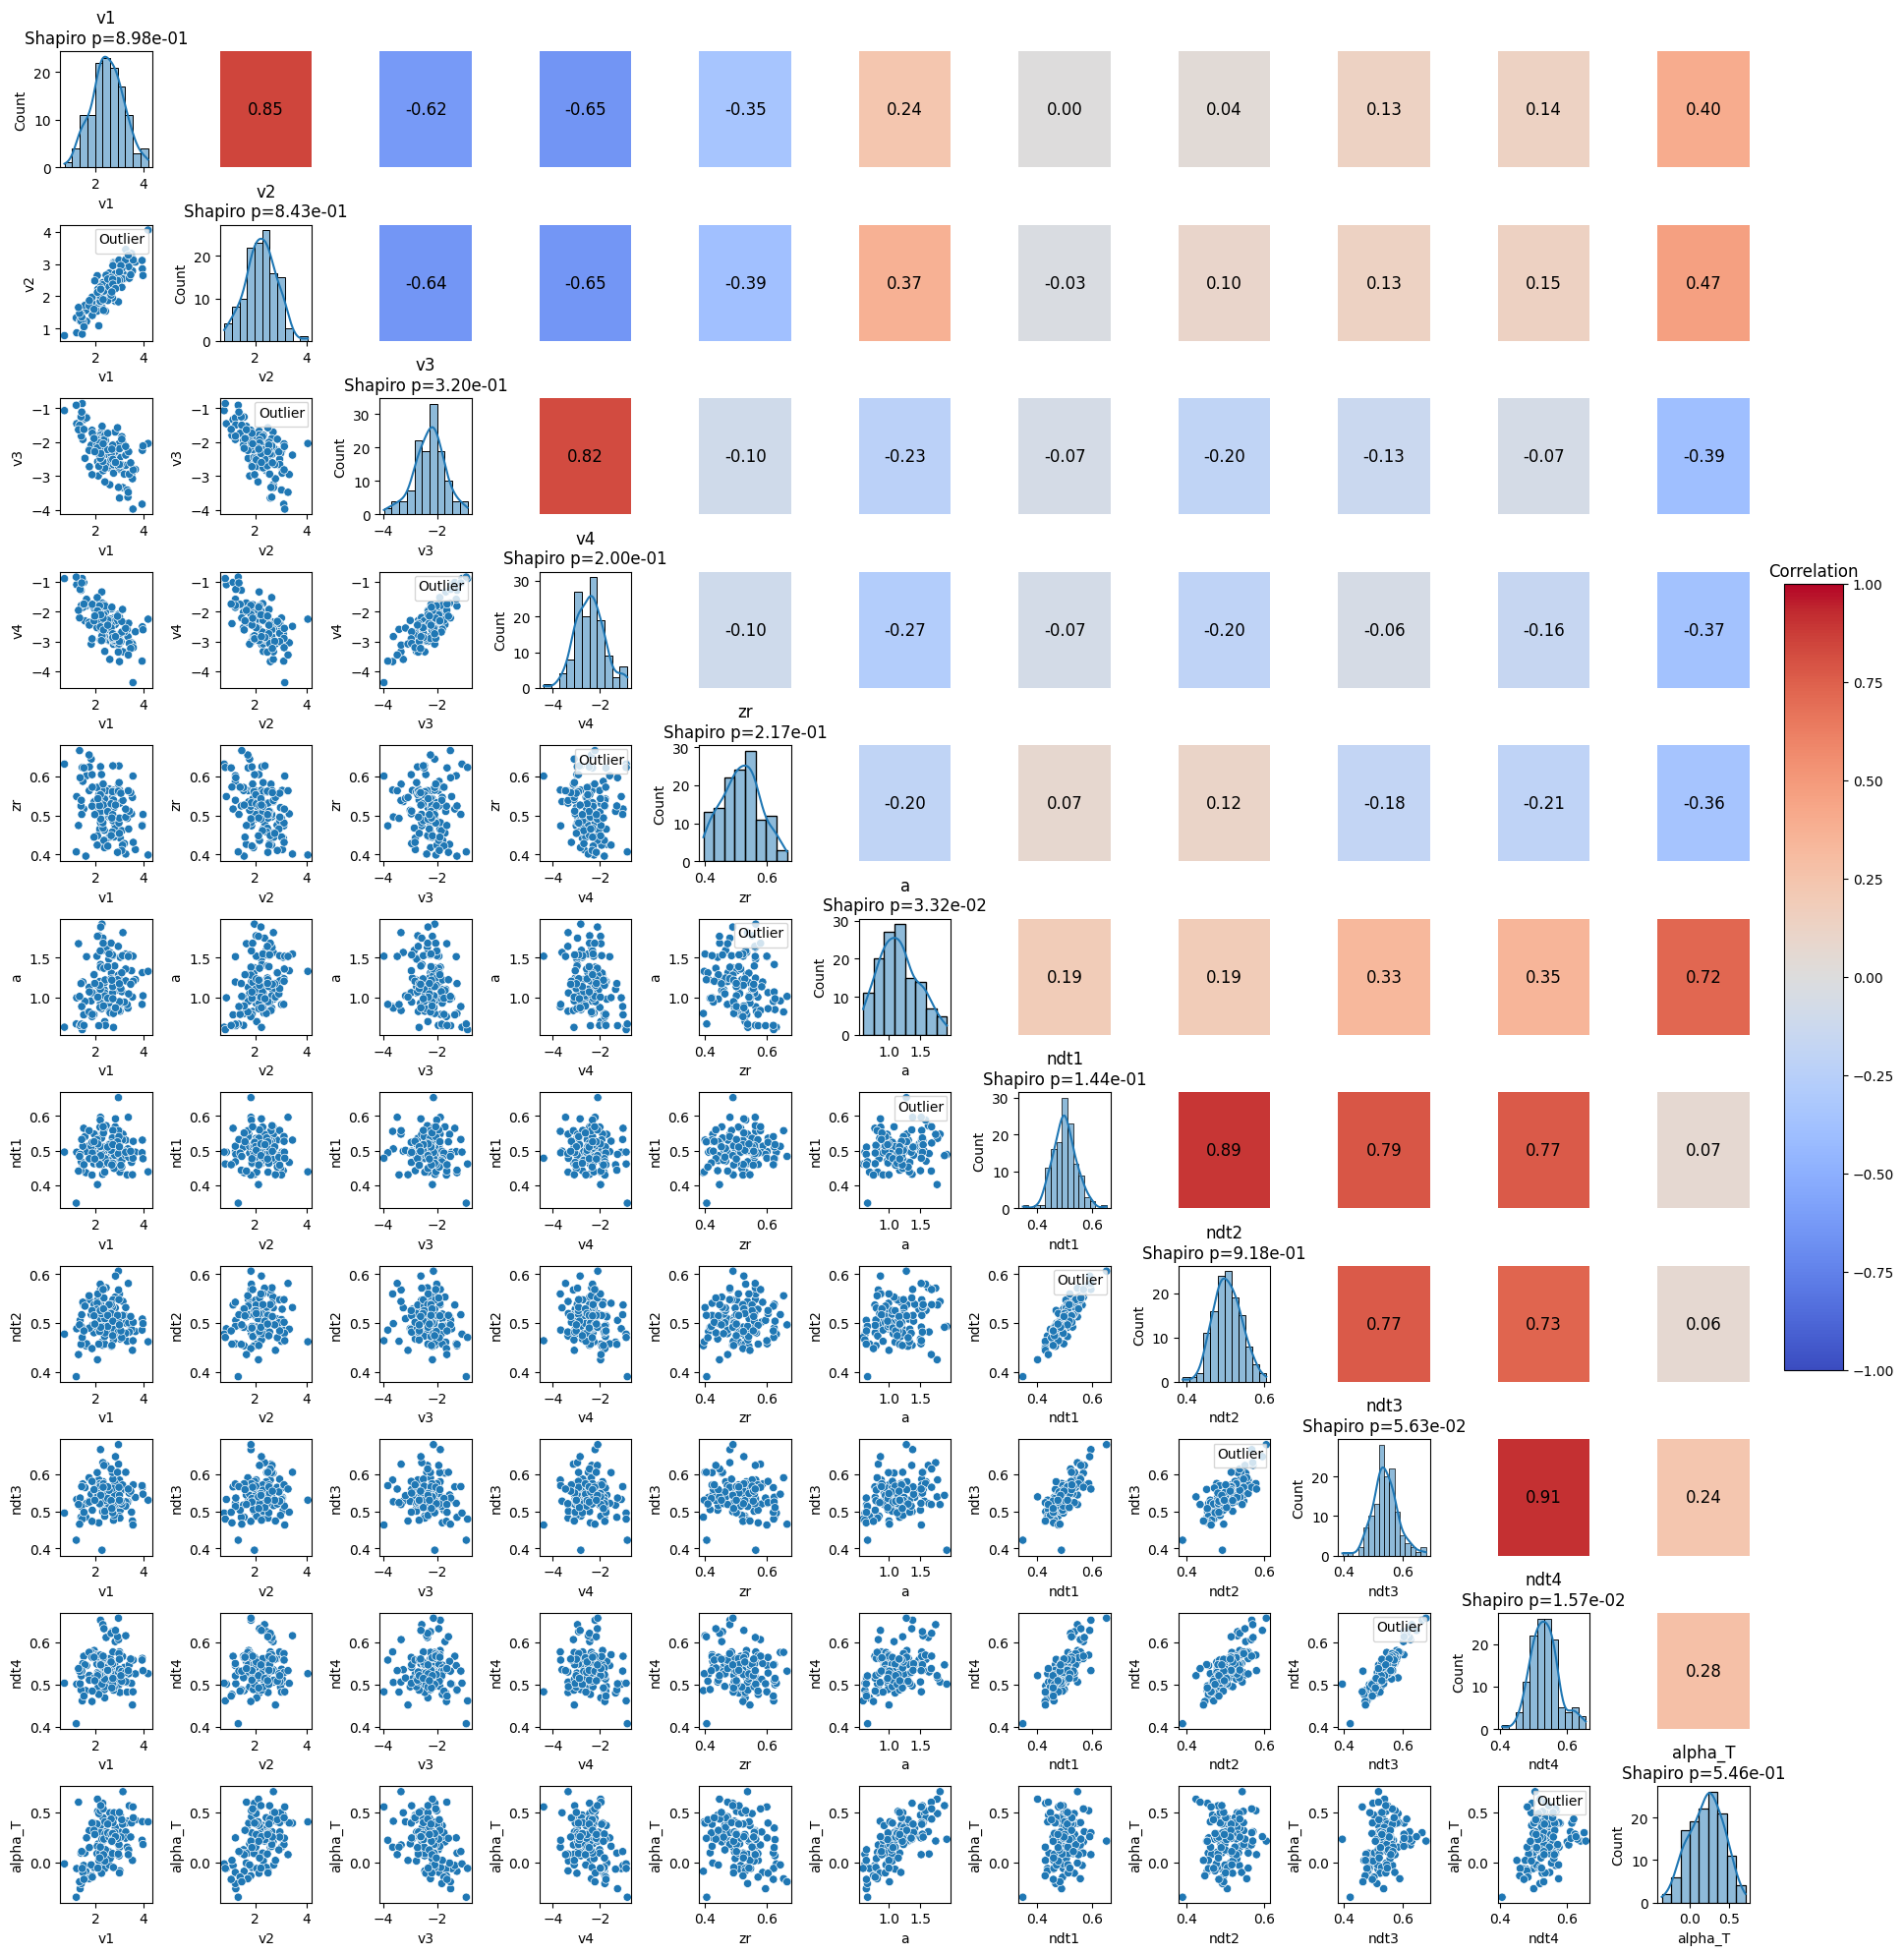

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('study2_associative_session_2_data_transformed.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 #'sndt_mean',
 #'alpha_mean',
  #  'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
   # 'accuracy_percentage_boxcox_after_arcsin'
                  ]

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'zr_mean': 'zr',
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_T', 
   # 'mean_log_rt': 'mean_log_rt', 
   # 'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
# ... [rest of your code remains unchanged] ...

# Define the colormap for the heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the visualization
fig, axn = plt.subplots(len(renamed_params), len(renamed_params), figsize=(20, 20))
cbar_ax = fig.add_axes([.91, .3, .03, .4])  # Adjust the position of the colorbar

for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        ax = axn[i, j]
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True, ax=ax)
            ax.set_title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False, ax=ax)
            if i == j + 1:
                ax.legend(loc='upper right', title='Outlier', prop={'size': 6})
            # ax.set_title(f'({param_j} vs {param_i})')
        else:
            corr_value = correlation_matrix_renamed.iloc[i, j]
            color = cmap((corr_value + 1) / 2)
            ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=color))
            ax.text(0.5, 0.5, f'{corr_value:.2f}', ha='center', va='center', fontsize=12)
            ax.axis('off')

# Create a colorbar
norm = plt.Normalize(vmin=-1, vmax=1)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar_ax.set_title('Correlation')

plt.tight_layout(rect=[0, 0, .9, 1])
plt.savefig('APT_S2_correlation_matrix_HeatMap_plot.png')  # Saves the plot to a file
plt.show()
plt.close()




In [3]:
import numpy as np
import scipy.stats as stats

# Define the safe Mahalanobis function
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Let's apply this to the first pair of parameters and check the result
pair = ['v1_mean', 'v2_mean']
data_pair = data[pair]

# Calculating Mahalanobis distance for the pair
mahal_distances = safe_mahalanobis(x=data_pair, data=data_pair)

# Determine the p-value threshold for outlier detection (p < 0.001)
p_value_threshold = 0.001

# Calculate the critical value for this p-value under the chi-squared distribution
critical_value = stats.chi2.ppf((1 - p_value_threshold), df=2)

# Identifying outliers
outliers = mahal_distances > critical_value

# Display the first few Mahalanobis distances and the outlier flags
mahal_distances[:5], outliers[:5]


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([1.36545901, 3.12654191, 0.19880641, 2.77498697, 1.84139981]),
 array([False, False, False, False, False]))

In [4]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

In [5]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

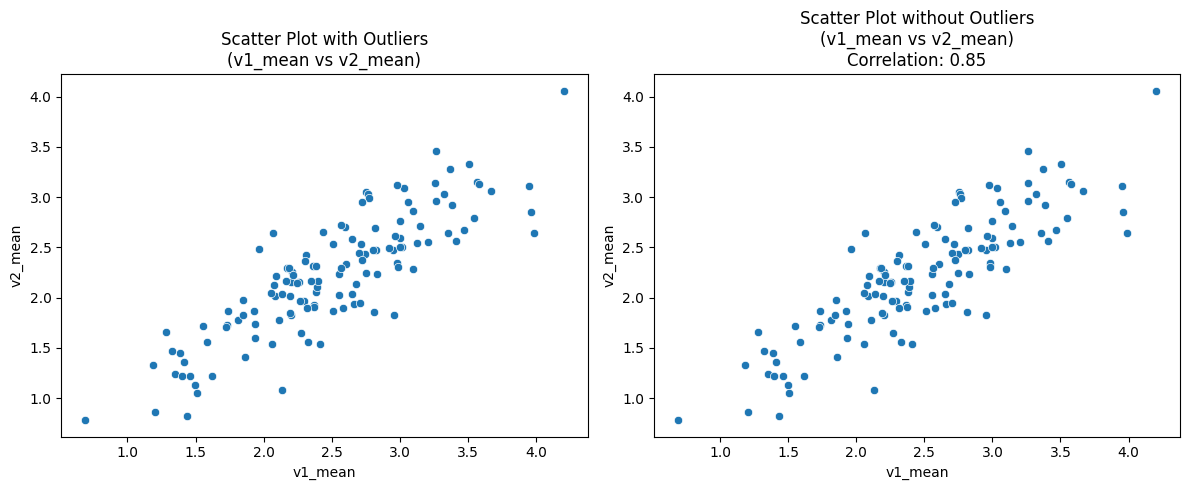

0.8514618745001787

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers for the first pair
data_no_outliers = data_subset[~outliers]

# Calculate correlation for the first pair without outliers
correlation = data_no_outliers.corr().iloc[0, 1]

# Plotting to show the process
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot with outliers
sns.scatterplot(data=data_subset, x=params[0], y=params[1], ax=ax[0])
ax[0].set_title(f'Scatter Plot with Outliers\n({params[0]} vs {params[1]})')

# Scatter plot without outliers
sns.scatterplot(data=data_no_outliers, x=params[0], y=params[1], ax=ax[1])
ax[1].set_title(f'Scatter Plot without Outliers\n({params[0]} vs {params[1]})\nCorrelation: {correlation:.2f}')

plt.tight_layout()
plt.show()

correlation


In [7]:
from itertools import combinations

# List of all selected parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'sndt_mean',
 'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Preparing a DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)

# Calculate Mahalanobis distance and correlations for each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation  # Mirror the matrix

# Fill diagonal with NaN as we will put histograms there
np.fill_diagonal(correlation_matrix.values, np.nan)

correlation_matrix.head()  # Displaying the first few rows for review


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v1_mean   v2_mean   v3_mean   v4_mean   zr_mean    a_mean ndt1_mean  \
v1_mean       NaN  0.851462 -0.620692 -0.650906 -0.347094  0.235573  0.001864   
v2_mean  0.851462       NaN -0.643023 -0.647434 -0.390552  0.373963 -0.030692   
v3_mean -0.620692 -0.643023       NaN  0.824005  -0.10043 -0.229971 -0.068719   
v4_mean -0.650906 -0.647434  0.824005       NaN -0.103645 -0.273948  -0.07168   
zr_mean -0.347094 -0.390552  -0.10043 -0.103645       NaN -0.203064  0.071659   

        ndt2_mean ndt3_mean ndt4_mean sndt_mean alpha_mean  \
v1_mean  0.038791  0.133449  0.137221 -0.457104   0.445349   
v2_mean  0.097829  0.134444   0.14661 -0.566019   0.492821   
v3_mean -0.202281 -0.132979 -0.070018  0.444278  -0.380997   
v4_mean -0.203902 -0.058534  -0.16365   0.35177  -0.364274   
zr_mean  0.116843 -0.184043 -0.210695  0.274597  -0.382525   

        accuracy_percentage mean_log_rt alpha_mean_boxcox_after_arcsin  \
v1_mean            0.663097   -0.160121                       0.404128   
v2_mean            0.759162   -0.033036                       0.466983   
v3_mean              -0.625    0.130827                      -0.392725   
v4_mean           -0.657708     0.10279                      -0.370632   
zr_mean           -0.180874   -0.136579                      -0.358152   

        accuracy_percentage_boxcox_after_arcsin  
v1_mean                                0.665269  
v2_mean                                0.759248  
v3_mean                               -0.645044  
v4_mean                               -0.669215  
zr_mean                               -0.239919

In [8]:
correlation_matrix

v1_mean   v2_mean   v3_mean  \
v1_mean                                       NaN  0.851462 -0.620692   
v2_mean                                  0.851462       NaN -0.643023   
v3_mean                                 -0.620692 -0.643023       NaN   
v4_mean                                 -0.650906 -0.647434  0.824005   
zr_mean                                 -0.347094 -0.390552  -0.10043   
a_mean                                   0.235573  0.373963 -0.229971   
ndt1_mean                                0.001864 -0.030692 -0.068719   
ndt2_mean                                0.038791  0.097829 -0.202281   
ndt3_mean                                0.133449  0.134444 -0.132979   
ndt4_mean                                0.137221   0.14661 -0.070018   
sndt_mean                               -0.457104 -0.566019  0.444278   
alpha_mean                               0.445349  0.492821 -0.380997   
accuracy_percentage                      0.663097  0.759162    -0.625   
mean_log_rt                             -0.160121 -0.033036  0.130827   
alpha_mean_boxcox_after_arcsin           0.404128  0.466983 -0.392725   
accuracy_percentage_boxcox_after_arcsin  0.665269  0.759248 -0.645044   

                                          v4_mean   zr_mean    a_mean  \
v1_mean                                 -0.650906 -0.347094  0.235573   
v2_mean                                 -0.647434 -0.390552  0.373963   
v3_mean                                  0.824005  -0.10043 -0.229971   
v4_mean                                       NaN -0.103645 -0.273948   
zr_mean                                 -0.103645       NaN -0.203064   
a_mean                                  -0.273948 -0.203064       NaN   
ndt1_mean                                -0.07168  0.071659  0.193513   
ndt2_mean                               -0.203902  0.116843  0.194266   
ndt3_mean                               -0.058534 -0.184043  0.332313   
ndt4_mean                                -0.16365 -0.210695   0.35078   
sndt_mean                                 0.35177  0.274597 -0.395812   
alpha_mean                              -0.364274 -0.382525  0.666005   
accuracy_percentage                     -0.657708 -0.180874  0.734445   
mean_log_rt                               0.10279 -0.136579  0.792498   
alpha_mean_boxcox_after_arcsin          -0.370632 -0.358152  0.723131   
accuracy_percentage_boxcox_after_arcsin -0.669215 -0.239919  0.811732   

                                        ndt1_mean ndt2_mean ndt3_mean  \
v1_mean                                  0.001864  0.038791  0.133449   
v2_mean                                 -0.030692  0.097829  0.134444   
v3_mean                                 -0.068719 -0.202281 -0.132979   
v4_mean                                  -0.07168 -0.203902 -0.058534   
zr_mean                                  0.071659  0.116843 -0.184043   
a_mean                                   0.193513  0.194266  0.332313   
ndt1_mean                                     NaN  0.894349  0.788871   
ndt2_mean                                0.894349       NaN  0.768048   
ndt3_mean                                0.788871  0.768048       NaN   
ndt4_mean                                0.770056  0.734048  0.912471   
sndt_mean                                0.260765    0.2092  0.072378   
alpha_mean                               0.124594  0.109456  0.251982   
accuracy_percentage                      0.088328  0.219411  0.287795   
mean_log_rt                              0.518977  0.532906  0.643108   
alpha_mean_boxcox_after_arcsin           0.065936  0.064847   0.23759   
accuracy_percentage_boxcox_after_arcsin  0.094286   0.19156  0.252947   

                                        ndt4_mean sndt_mean alpha_mean  \
v1_mean                                  0.137221 -0.457104   0.445349   
v2_mean                                   0.14661 -0.566019   0.492821   
v3_mean                                 -0.070018  0.444278  -0.380997   
v4_mean             

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

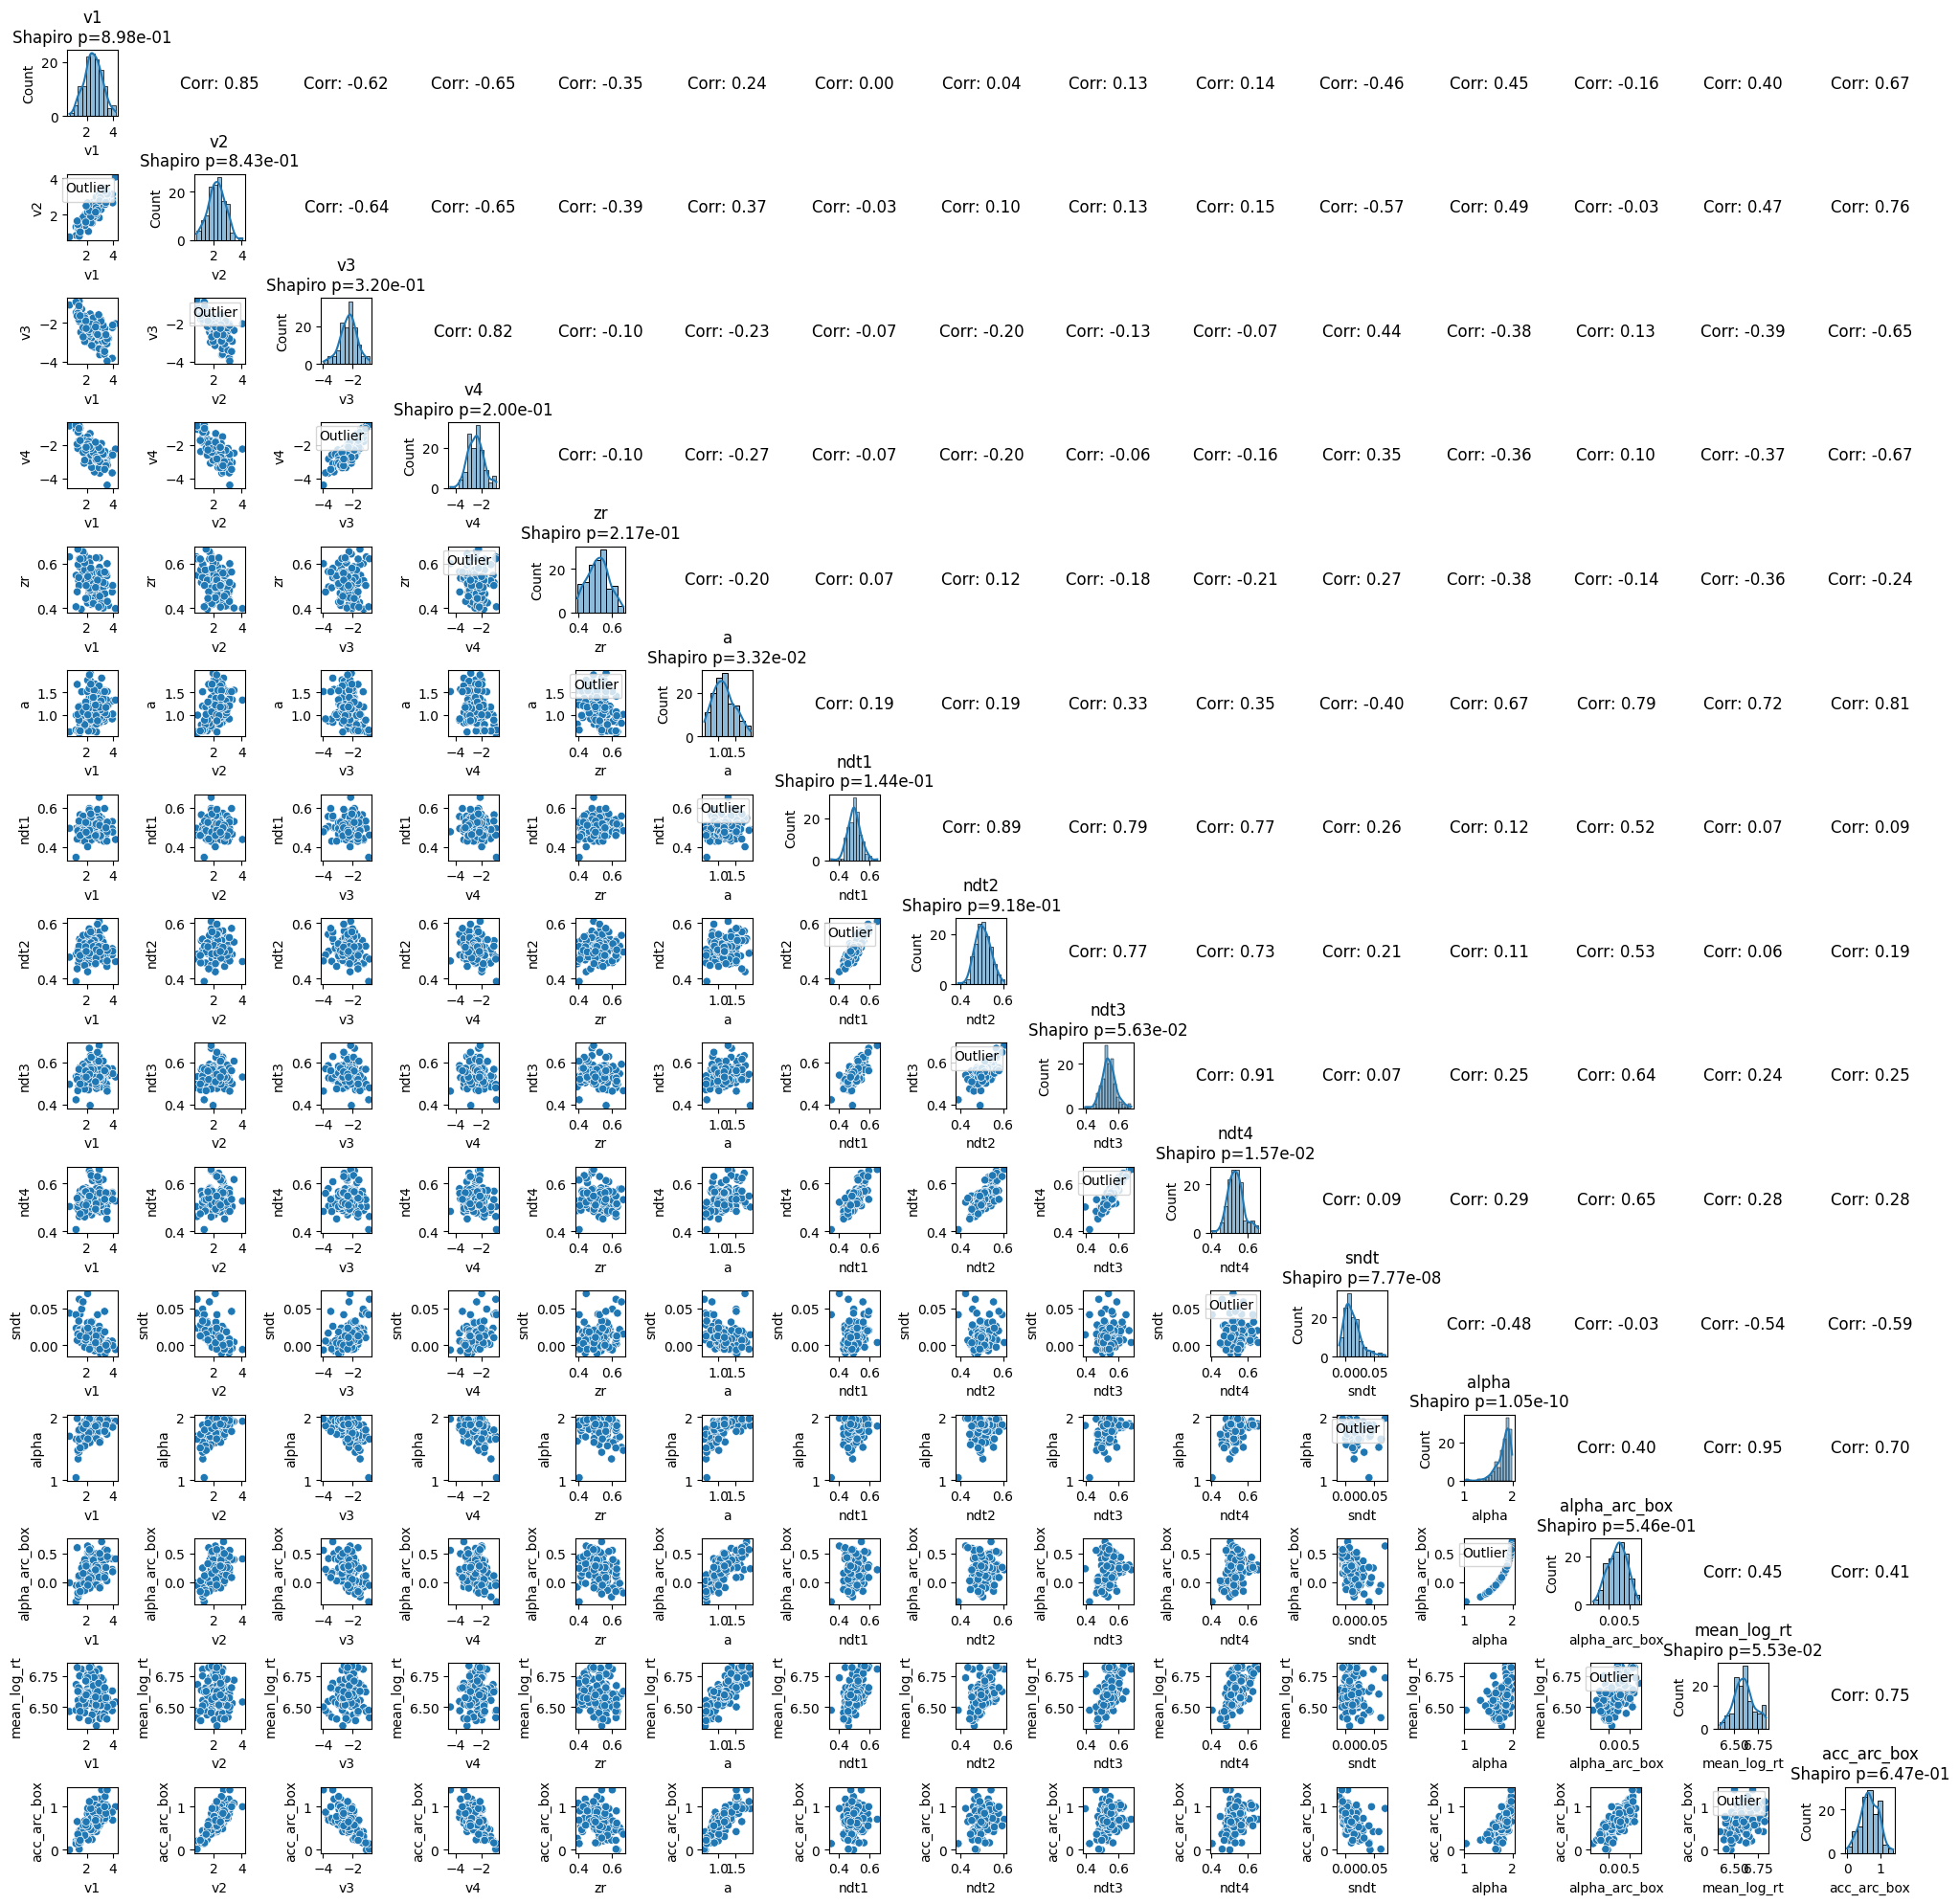

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('study2_associative_session_2_data_transformed.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'sndt_mean',
 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'zr_mean': 'zr', 'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
          #  plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.savefig('APT_S2_correlation_matrix_plot.png')  # Saves the plot to a file
plt.show()
plt.close()



In [10]:
correlation_matrix_renamed.to_csv('Distinct_APT_s2_correlation_matrix.csv')

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

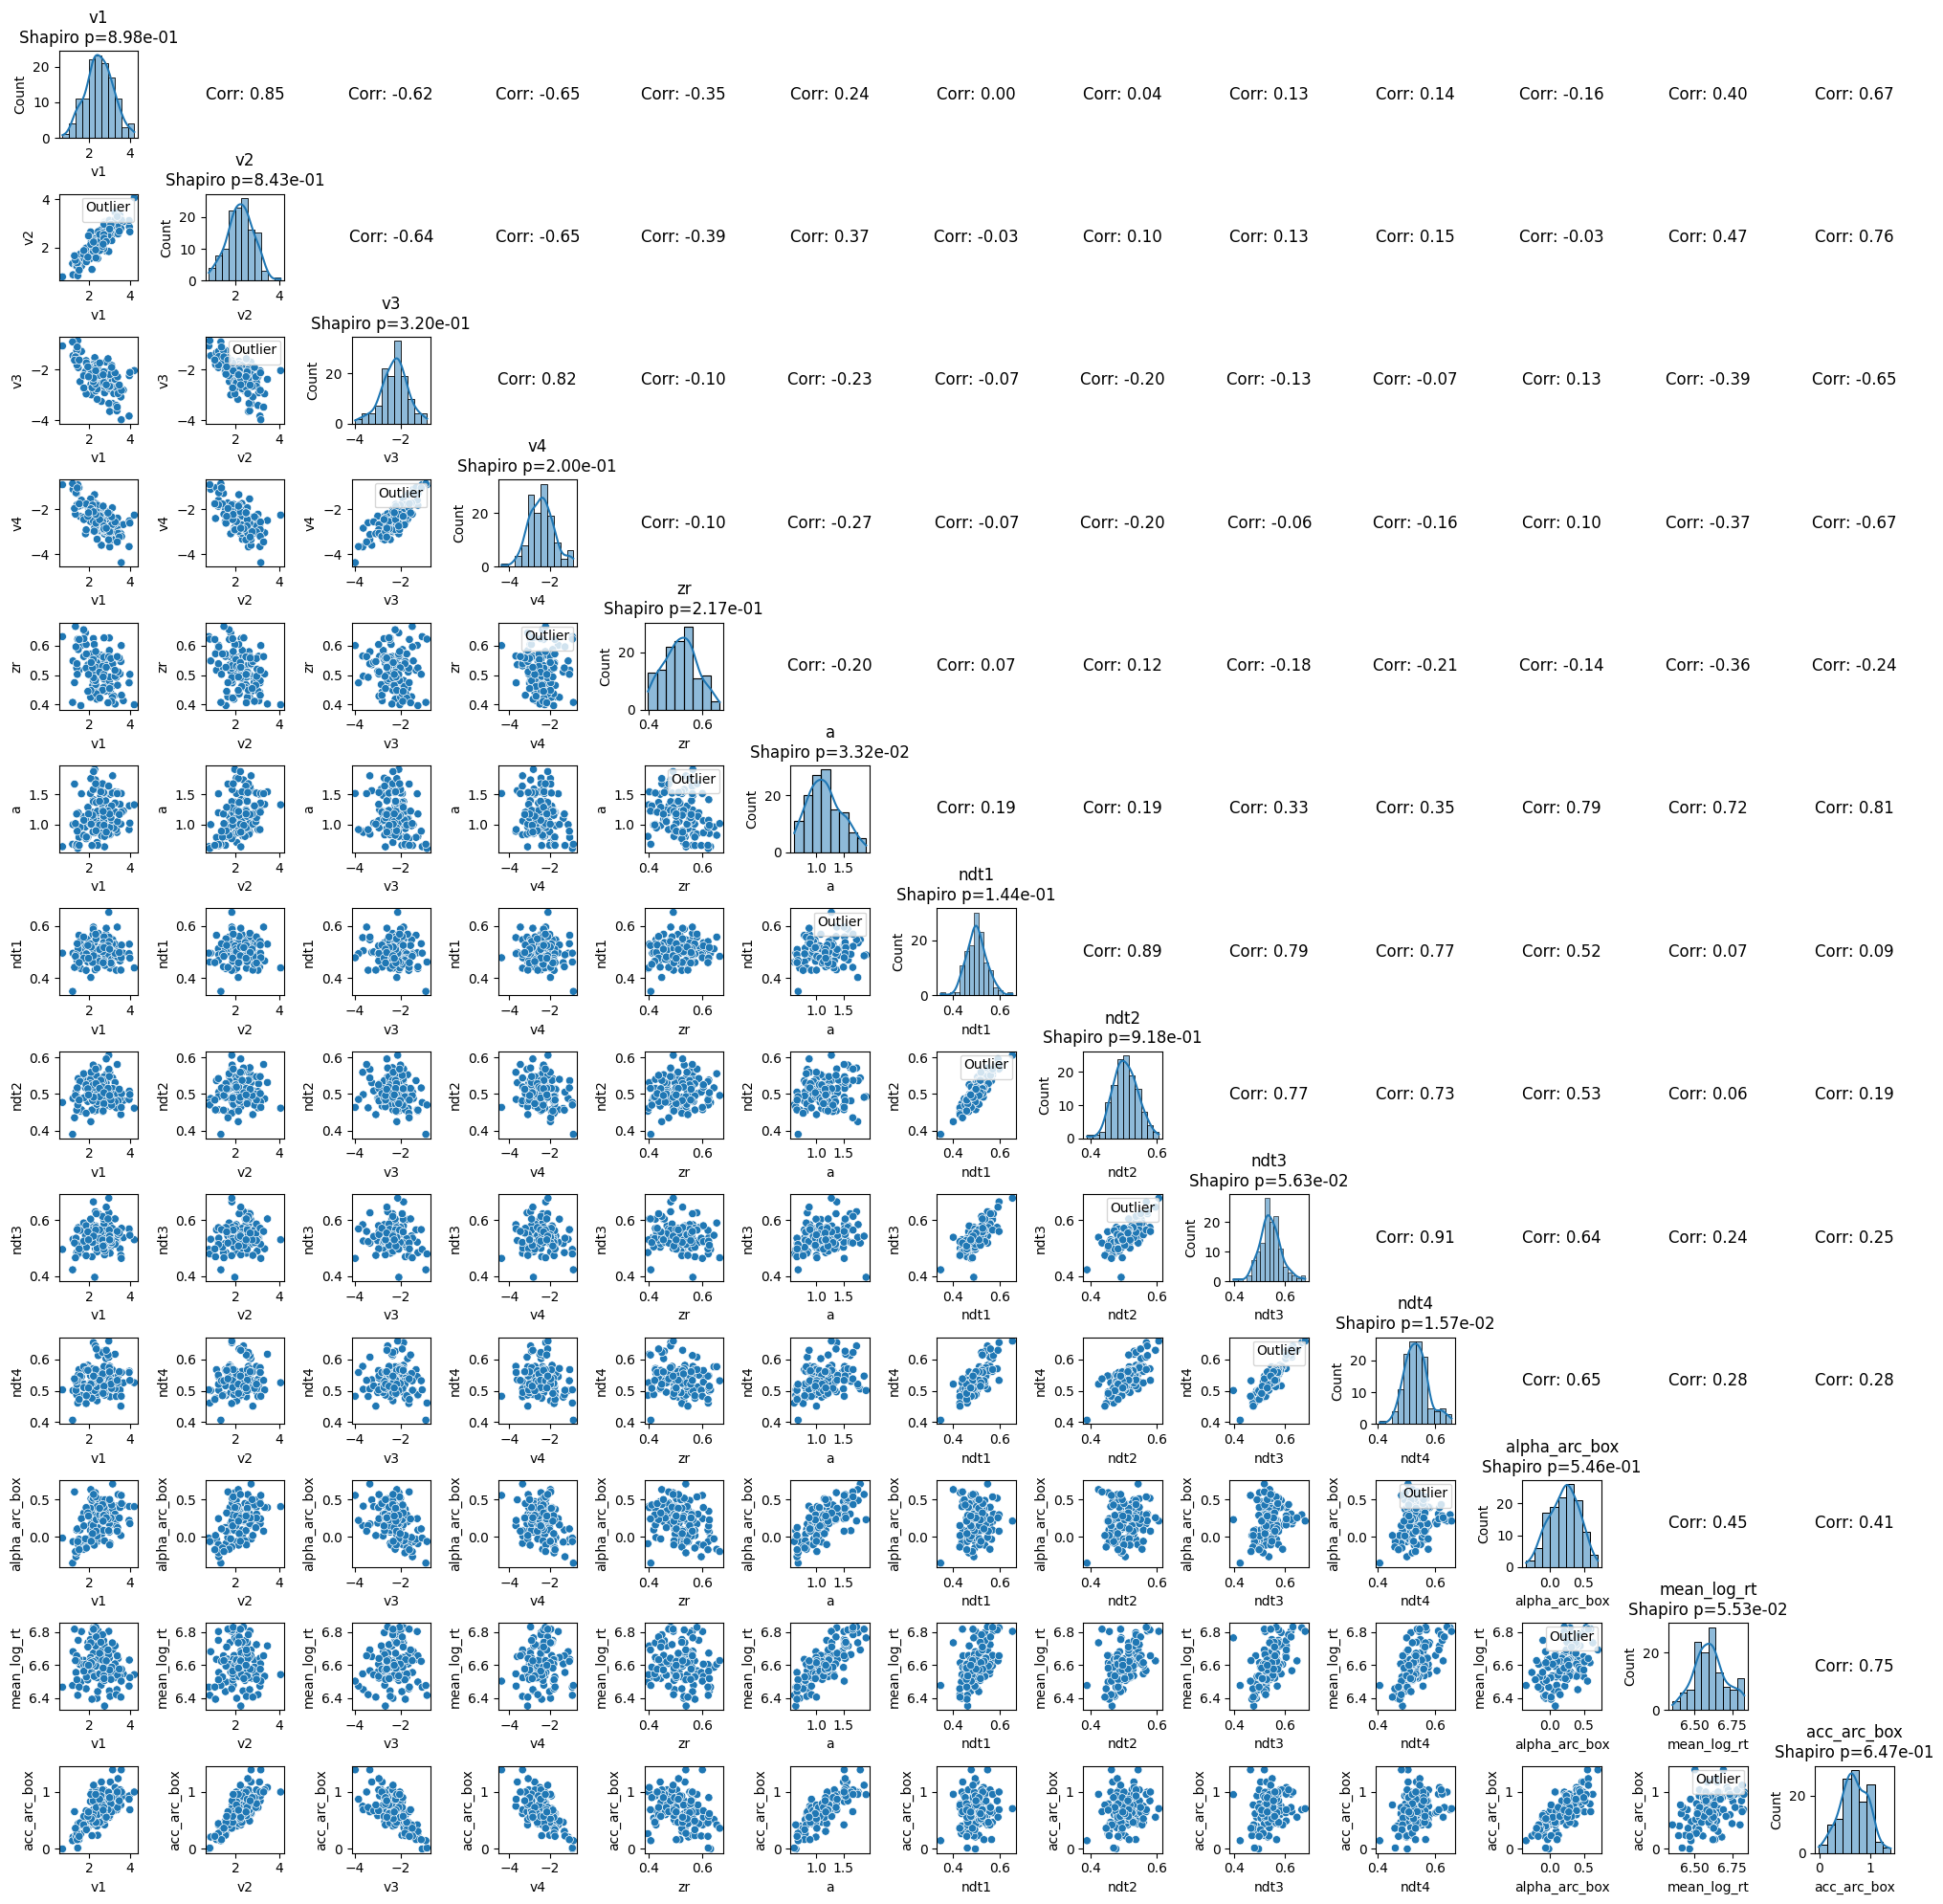

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('study2_associative_session_2_data_transformed.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
# 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'zr_mean': 'zr', 'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('APT_S2_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [12]:
correlation_matrix_renamed

v1        v2        v3        v4        zr         a  \
v1                  NaN  0.851462 -0.620692 -0.650906 -0.347094  0.235573   
v2             0.851462       NaN -0.643023 -0.647434 -0.390552  0.373963   
v3            -0.620692 -0.643023       NaN  0.824005  -0.10043 -0.229971   
v4            -0.650906 -0.647434  0.824005       NaN -0.103645 -0.273948   
zr            -0.347094 -0.390552  -0.10043 -0.103645       NaN -0.203064   
a              0.235573  0.373963 -0.229971 -0.273948 -0.203064       NaN   
ndt1           0.001864 -0.030692 -0.068719  -0.07168  0.071659  0.193513   
ndt2           0.038791  0.097829 -0.202281 -0.203902  0.116843  0.194266   
ndt3           0.133449  0.134444 -0.132979 -0.058534 -0.184043  0.332313   
ndt4           0.137221   0.14661 -0.070018  -0.16365 -0.210695   0.35078   
mean_log_rt   -0.160121 -0.033036  0.130827   0.10279 -0.136579  0.792498   
alpha_arc_box  0.404128  0.466983 -0.392725 -0.370632 -0.358152  0.723131   
acc_arc_box    0.665269  0.759248 -0.645044 -0.669215 -0.239919  0.811732   

                   ndt1      ndt2      ndt3      ndt4 mean_log_rt  \
v1             0.001864  0.038791  0.133449  0.137221   -0.160121   
v2            -0.030692  0.097829  0.134444   0.14661   -0.033036   
v3            -0.068719 -0.202281 -0.132979 -0.070018    0.130827   
v4             -0.07168 -0.203902 -0.058534  -0.16365     0.10279   
zr             0.071659  0.116843 -0.184043 -0.210695   -0.136579   
a              0.193513  0.194266  0.332313   0.35078    0.792498   
ndt1                NaN  0.894349  0.788871  0.770056    0.518977   
ndt2           0.894349       NaN  0.768048  0.734048    0.532906   
ndt3           0.788871  0.768048       NaN  0.912471    0.643108   
ndt4           0.770056  0.734048  0.912471       NaN    0.646829   
mean_log_rt    0.518977  0.532906  0.643108  0.646829         NaN   
alpha_arc_box  0.065936  0.064847   0.23759  0.280632    0.449022   
acc_arc_box    0.094286   0.19156  0.252947  0.278942    0.407816   

              alpha_arc_box acc_arc_box  
v1                 0.404128    0.665269  
v2                 0.466983    0.759248  
v3                -0.392725   -0.645044  
v4                -0.370632   -0.669215  
zr                -0.358152   -0.239919  
a                  0.723131    0.811732  
ndt1               0.065936    0.094286  
ndt2               0.064847     0.19156  
ndt3                0.23759    0.252947  
ndt4               0.280632    0.278942  
mean_log_rt        0.449022    0.407816  
alpha_arc_box           NaN    0.752214  
acc_arc_box        0.752214         NaN

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

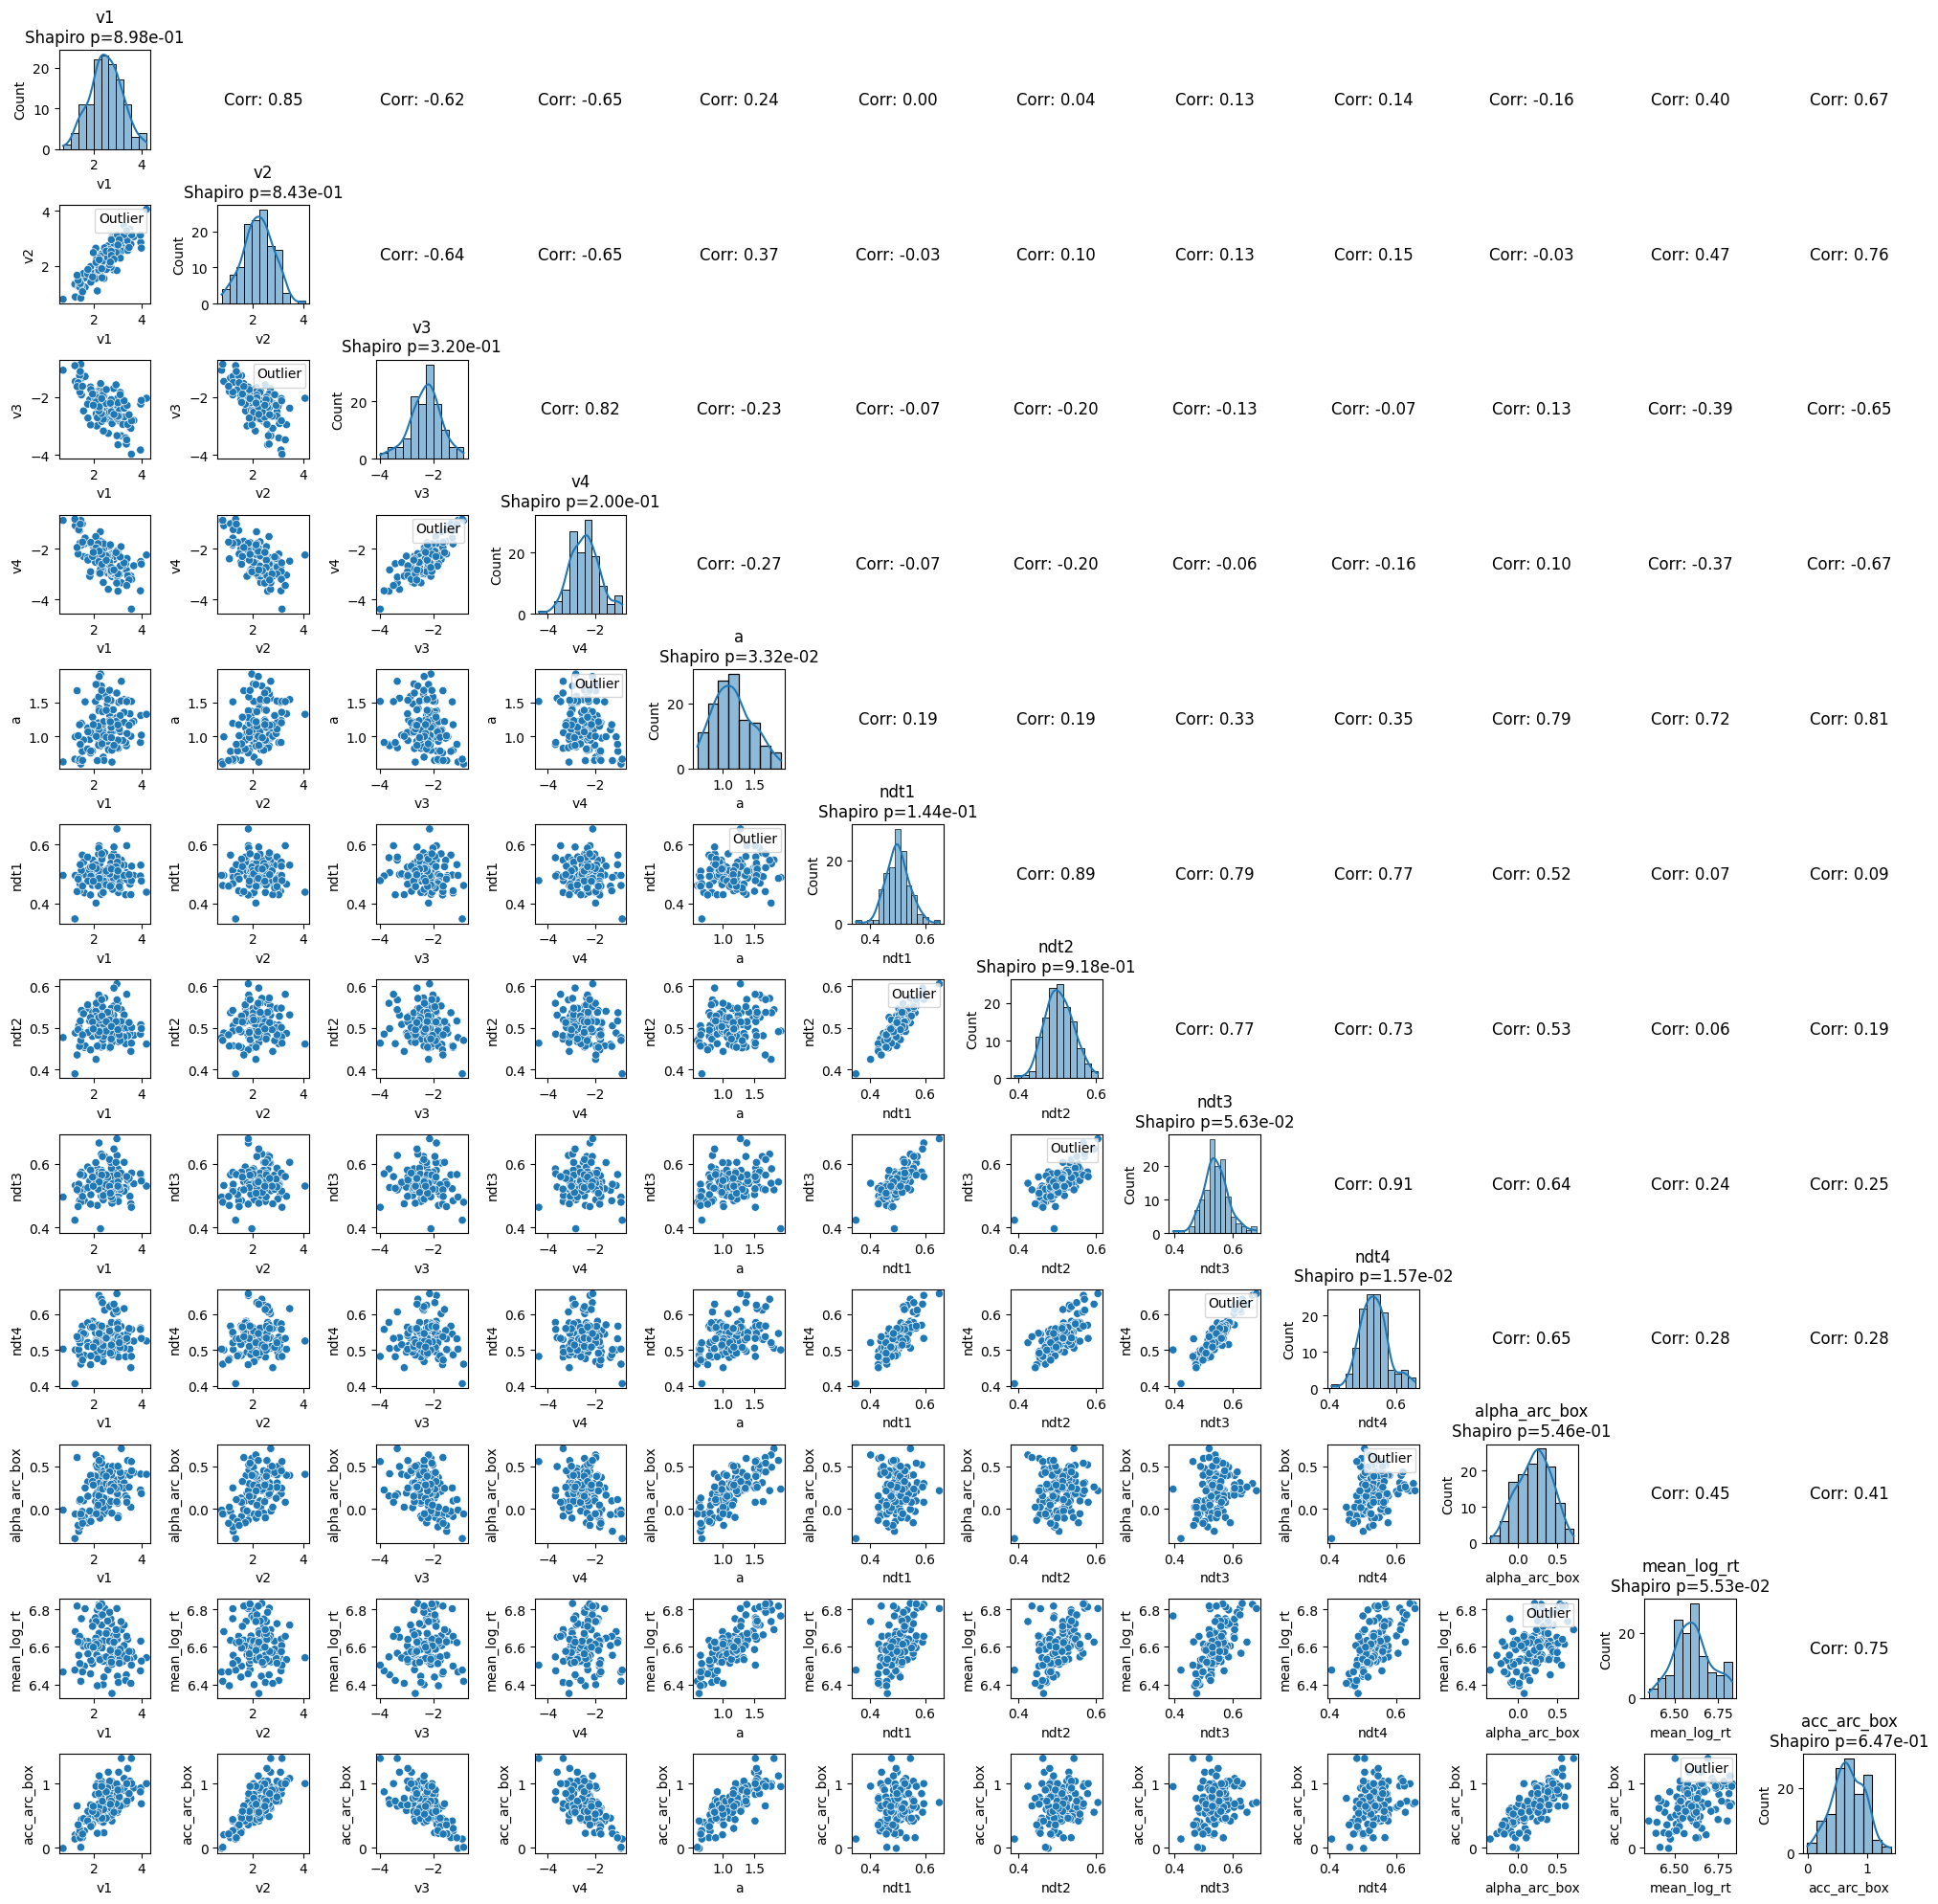

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('study2_associative_session_2_data_transformed.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
# 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
# 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
   # 'zr_mean': 'zr', 
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('APT_S2_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [14]:
correlation_matrix_renamed

v1        v2        v3        v4         a      ndt1  \
v1                  NaN  0.851462 -0.620692 -0.650906  0.235573  0.001864   
v2             0.851462       NaN -0.643023 -0.647434  0.373963 -0.030692   
v3            -0.620692 -0.643023       NaN  0.824005 -0.229971 -0.068719   
v4            -0.650906 -0.647434  0.824005       NaN -0.273948  -0.07168   
a              0.235573  0.373963 -0.229971 -0.273948       NaN  0.193513   
ndt1           0.001864 -0.030692 -0.068719  -0.07168  0.193513       NaN   
ndt2           0.038791  0.097829 -0.202281 -0.203902  0.194266  0.894349   
ndt3           0.133449  0.134444 -0.132979 -0.058534  0.332313  0.788871   
ndt4           0.137221   0.14661 -0.070018  -0.16365   0.35078  0.770056   
mean_log_rt   -0.160121 -0.033036  0.130827   0.10279  0.792498  0.518977   
alpha_arc_box  0.404128  0.466983 -0.392725 -0.370632  0.723131  0.065936   
acc_arc_box    0.665269  0.759248 -0.645044 -0.669215  0.811732  0.094286   

                   ndt2      ndt3      ndt4 mean_log_rt alpha_arc_box  \
v1             0.038791  0.133449  0.137221   -0.160121      0.404128   
v2             0.097829  0.134444   0.14661   -0.033036      0.466983   
v3            -0.202281 -0.132979 -0.070018    0.130827     -0.392725   
v4            -0.203902 -0.058534  -0.16365     0.10279     -0.370632   
a              0.194266  0.332313   0.35078    0.792498      0.723131   
ndt1           0.894349  0.788871  0.770056    0.518977      0.065936   
ndt2                NaN  0.768048  0.734048    0.532906      0.064847   
ndt3           0.768048       NaN  0.912471    0.643108       0.23759   
ndt4           0.734048  0.912471       NaN    0.646829      0.280632   
mean_log_rt    0.532906  0.643108  0.646829         NaN      0.449022   
alpha_arc_box  0.064847   0.23759  0.280632    0.449022           NaN   
acc_arc_box     0.19156  0.252947  0.278942    0.407816      0.752214   

              acc_arc_box  
v1               0.665269  
v2               0.759248  
v3              -0.645044  
v4              -0.669215  
a                0.811732  
ndt1             0.094286  
ndt2              0.19156  
ndt3             0.252947  
ndt4             0.278942  
mean_log_rt      0.407816  
alpha_arc_box    0.752214  
acc_arc_box           NaN